# 1. Introduction

The Paris Olympic 2024 marks a significant event in the world of sports, bringing together athletes from across the globe to compete in various disciplines. This analysis leverages data related to the event, providing insights into several key aspects:

- **Athlete Demographics**: Analyzing the height, weight, and age distribution of athletes.
- **Country Participation**: Highlighting the countries with the highest participation rates and trends over time.
- **Events Timeline**: Visualizing the schedule of events and analyzing potential scheduling conflicts for athletes.
- **Prime Time Analysis**: Examining events scheduled during prime time and their potential impact on viewership.
- **Medal Distribution**: Exploring the distribution of medals among participating nations, identifying top performers and significant trends.

This notebook aims to provide a comprehensive overview of these aspects, offering a deeper understanding of the Paris Olympic 2024.

<div align="center">
    <img src="attachment:efaa53f1-efc6-4022-87de-49dcc8e0493b.png" alt="image.png">
</div>


# 2. Details  
The Paris 2024 Summer Olympics, officially known as the Games of the XXXIII Olympiad, are scheduled to take place from **July 26 to August 11, 2024**. This will be the third time Paris has hosted the Olympics, with the previous Games held in 1900 and 1924.

### Key Details:

1. **Venues**:
   - **Stade de France** in Saint-Denis will host the opening and closing ceremonies, as well as the athletics events.
   - **Eiffel Tower** area will host the beach volleyball competitions.
   - **Champs-Élysées** will be used for the cycling road race.
   - Other famous landmarks, such as the Seine River, will serve as scenic backdrops for various events.

2. **New Sports**:
   - **Breaking (Breakdancing)** will make its Olympic debut.
   - **Skateboarding**, **surfing**, and **sport climbing**, which debuted in Tokyo 2020, will return.

3. **Sustainability**:
   - Paris 2024 emphasizes sustainability, aiming to have the smallest carbon footprint in Olympic history. Many venues are existing or temporary, and the Games plan to use 100% renewable energy.

4. **Paralympics**:
   - The Paralympic Games will follow from **August 28 to September 8, 2024**.

5. **Tickets**:
   - The ticketing strategy is designed to be inclusive, with some tickets priced as low as €24 for Olympic events and €15 for Paralympic events.

6. **Mascot**:
   - The official mascot for Paris 2024 is **Phryge**. It’s inspired by the Phrygian cap, a symbol of freedom and the French Revolution.

<div align="center">
    <img src="attachment:59bfbce4-db1e-4a4e-9439-eb4cbe23abab.png" alt="image1.png">
</div>

The Paris 2024 Olympics are expected to be a celebration of sport, culture, and sustainability, blending the city's rich history with modern innovation.


# 3. Dataset Overview

This analysis utilizes several datasets related to the Paris Olympic 2024. Below is a brief description of each relevant file and its key columns:

- **athletes.csv**: Contains data on athletes participating in the Paris Olympics 2024.
  - **Key Columns**:
    - `Name`: Athlete's name.
    - `Country`: Country the athlete represents.
    - `Discipline`: Sport or event the athlete is competing in.
    - `Height`: Athlete's height in centimeters.
    - `Weight`: Athlete's weight in kilograms.
    - `Age`: Athlete's age.

- **events.csv**: Provides details about the events scheduled during the Olympics.
  - **Key Columns**:
    - `Event`: Name of the event.
    - `Discipline`: Sport or discipline associated with the event.
    - `Gender`: Gender category for the event (Men/Women/Mixed).
    - `Medal`: Indicates if the event is a medal event.

- **medals.csv**: Contains information on the medals awarded during the Olympics.
  - **Key Columns**:
    - `Country`: Country that won the medal.
    - `Discipline`: Sport or event associated with the medal.
    - `Medal`: Type of medal won (Gold/Silver/Bronze).

- **schedules.csv**: Details the schedule of events throughout the Olympics.
  - **Key Columns**:
    - `Start_Date`: Start date and time of the event.
    - `End_Date`: End date and time of the event.
    - `Discipline`: Sport or event associated with the schedule.
    - `Venue`: Location where the event takes place.

- **teams.csv**: Contains data about the teams participating in the Olympics.
  - **Key Columns**:
    - `Team_Name`: Name of the team.
    - `Country`: Country the team represents.
    - `Discipline`: Sport or event in which the team is participating.

This section provides an overview of the data used in the analysis, highlighting the key columns that will be used for deriving insights in subsequent sections.


# 4. Importing Necessary Libraries

To perform the analysis and visualize the data effectively, we need to import several Python libraries. These libraries will allow us to manipulate the data, conduct statistical analysis, and create visualizations.

Below is the list of libraries we will use:
- **Pandas**: For data manipulation and analysis, especially for handling structured data in DataFrames.
- **NumPy**: To perform numerical operations efficiently.
- **Matplotlib/Plotly**: For creating static and interactive visualizations to explore data trends and patterns.
- **Seaborn**: For creating informative and attractive statistical graphics.
- **Other Libraries**: Any additional libraries specific to the analysis tasks, such as datetime for handling date and time data.

Let's start by importing these libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
import plotly.graph_objs as go

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

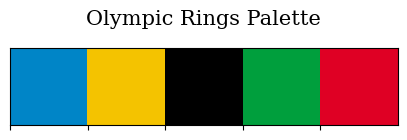

In [4]:
# Define the Olympic ring colors
olympic_colors = ['#0085C7', '#F4C300', '#000000', '#009F3D', '#DF0024']  # Blue, Yellow, Black, Green, Red

sns.palplot(olympic_colors)
plt.title("Olympic Rings Palette", loc='center', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

# 5. Analysis

## 5.1 Athlete Demographics

### Height and Weight Analysis

In [5]:
athlete_df = pd.read_csv("athletes.csv")
athlete_df.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Father, Gevorg Aleksanyan","Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN
2,1532874,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,Personal: Martin Alekhanyan (ARM).<br>National...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Diana (married October 2022). Daughter, ...",Armenian,National: Habetnak Kurghinyan,While doing karate he noticed wrestlers traini...,"Wrestler Armen Nazaryan (ARM, BUL), two-time O...",NaN,"“Nothing is impossible, set goals in front of ...",NaN,NaN,NaN
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Sona (married November 2023)","Armenian, Russian",National: Habetnak Kurghinyan (ARM),“My family did not like wrestling very much. A...,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
athlete_df.columns

Index(['code', 'name', 'name_short', 'name_tv', 'gender', 'function',
       'country_code', 'country', 'country_full', 'nationality',
       'nationality_full', 'nationality_code', 'height', 'weight',
       'disciplines', 'events', 'birth_date', 'birth_place', 'birth_country',
       'residence_place', 'residence_country', 'nickname', 'hobbies',
       'occupation', 'education', 'family', 'lang', 'coach', 'reason', 'hero',
       'influence', 'philosophy', 'sporting_relatives', 'ritual',
       'other_sports'],
      dtype='object')

In [7]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11110 entries, 0 to 11109
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                11110 non-null  int64  
 1   name                11110 non-null  object 
 2   name_short          11110 non-null  object 
 3   name_tv             11110 non-null  object 
 4   gender              11110 non-null  object 
 5   function            11110 non-null  object 
 6   country_code        11110 non-null  object 
 7   country             11110 non-null  object 
 8   country_full        11110 non-null  object 
 9   nationality         11091 non-null  object 
 10  nationality_full    11091 non-null  object 
 11  nationality_code    11091 non-null  object 
 12  height              11110 non-null  int64  
 13  weight              11092 non-null  float64
 14  disciplines         11110 non-null  object 
 15  events              11110 non-null  object 
 16  birt

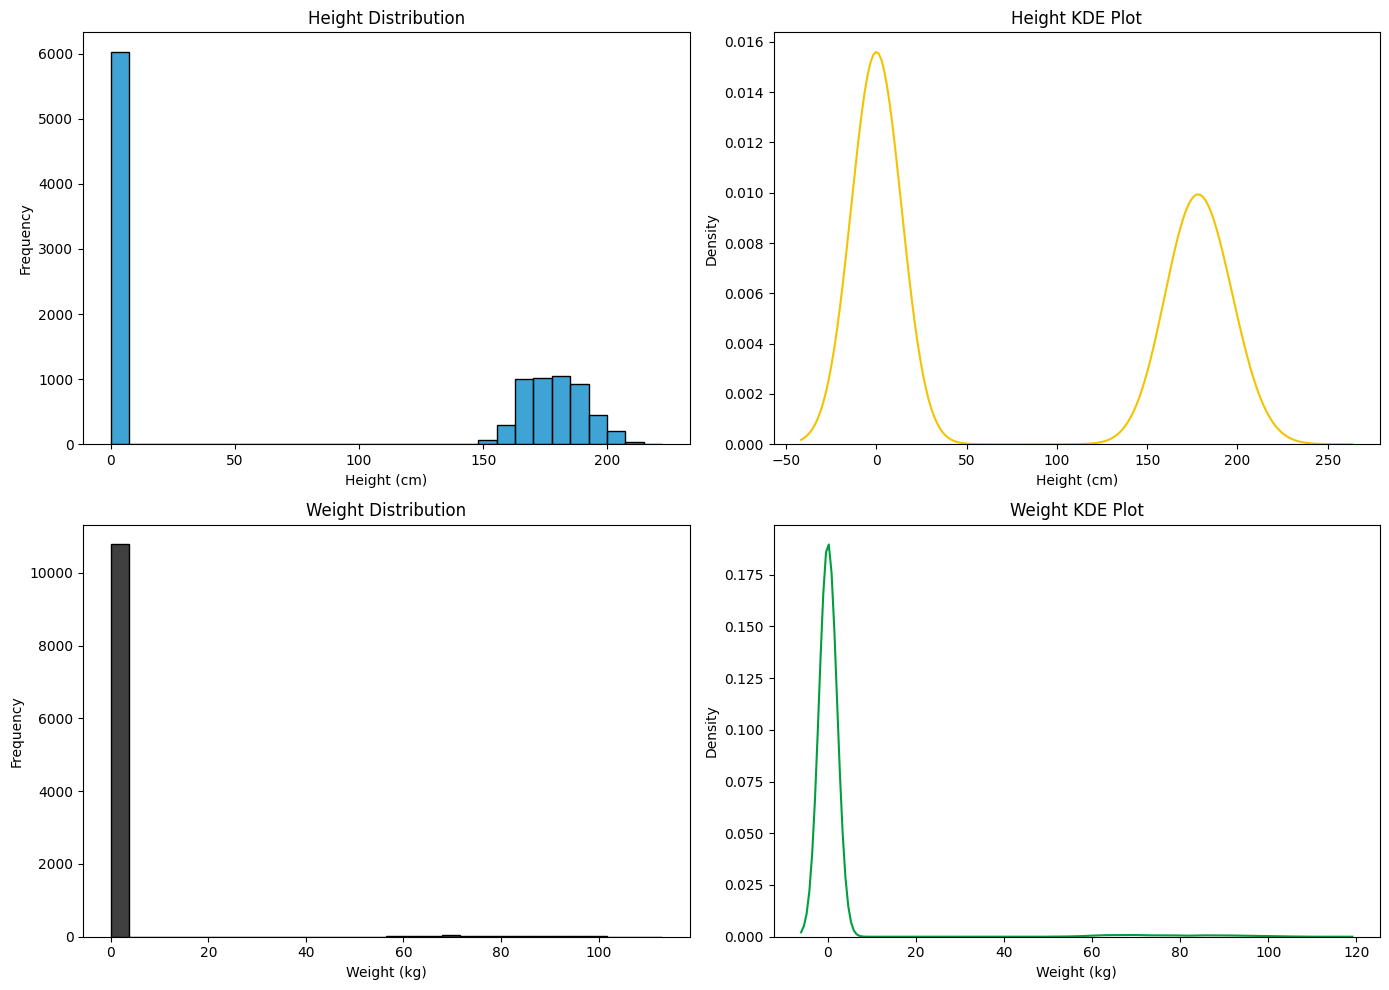

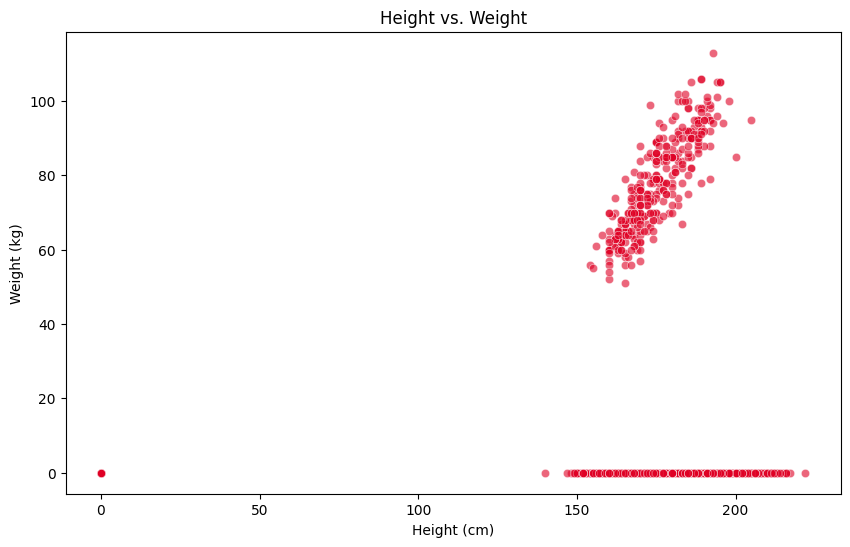

In [8]:
# Drop rows with NaN values in height or weight
athlete_df = athlete_df.dropna(subset=['height', 'weight'])

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for height
sns.histplot(athlete_df['height'], bins=30, kde=False, ax=axs[0, 0], color=olympic_colors[0])
axs[0, 0].set_title('Height Distribution')
axs[0, 0].set_xlabel('Height (cm)')
axs[0, 0].set_ylabel('Frequency')

# KDE plot for height
sns.kdeplot(athlete_df['height'], ax=axs[0, 1], color=olympic_colors[1])
axs[0, 1].set_title('Height KDE Plot')
axs[0, 1].set_xlabel('Height (cm)')
axs[0, 1].set_ylabel('Density')

# Histogram for weight
sns.histplot(athlete_df['weight'], bins=30, kde=False, ax=axs[1, 0], color=olympic_colors[2])
axs[1, 0].set_title('Weight Distribution')
axs[1, 0].set_xlabel('Weight (kg)')
axs[1, 0].set_ylabel('Frequency')

# KDE plot for weight
sns.kdeplot(athlete_df['weight'], ax=axs[1, 1], color=olympic_colors[3])
axs[1, 1].set_title('Weight KDE Plot')
axs[1, 1].set_xlabel('Weight (kg)')
axs[1, 1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

# Scatter plot for height vs. weight
plt.figure(figsize=(10, 6))
sns.scatterplot(data=athlete_df, x='height', y='weight', alpha=0.6, color=olympic_colors[4])
plt.title('Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

### Age Distribution

In [9]:
athlete_df['birth_date'].head()

,birth_date
0,1991-10-21
1,1999-01-22
2,1996-12-21
3,1999-11-22
4,1999-10-27


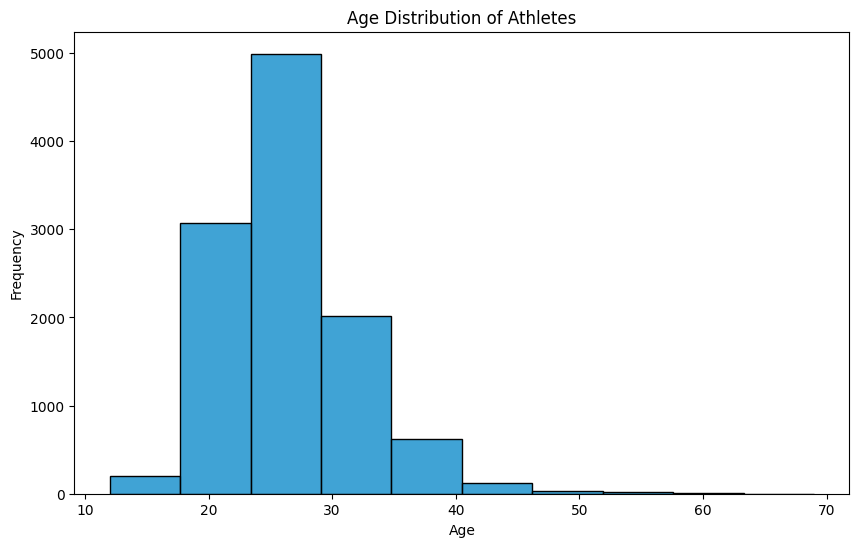

In [10]:
# Convert birth_date to datetime format
athlete_df['birth_date'] = pd.to_datetime(athlete_df['birth_date'])

# Calculate age of each athlete
def calculate_age(birth_date):
    today = datetime.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age

athlete_df['age'] = athlete_df['birth_date'].apply(calculate_age)

# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(athlete_df['age'], bins=10, kde=False, color='#0085C7')  # Using one of the Olympic colors
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 5.2 Country Participation

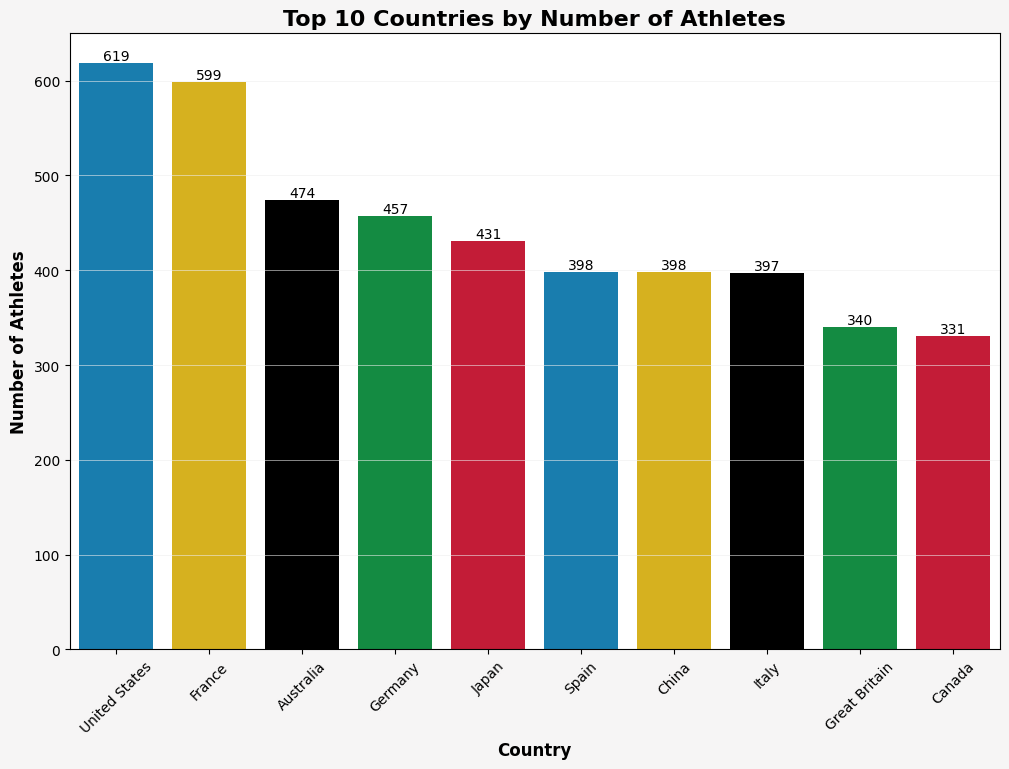

In [11]:
# Count the number of athletes from each country
country_counts = athlete_df['country'].value_counts()

# Select the top 10 countries based on athlete count
top_10_countries = country_counts.nlargest(10)

# Plot the bar chart for number of athletes by top 10 countries
plt.figure(figsize=(12, 8), facecolor='#f6f5f5')

# Create the bar plot with the Olympic color palette
ax = sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette=olympic_colors)

# Customize the plot
ax.set_xlabel('Country', fontsize=12, weight='bold')
ax.set_ylabel('Number of Athletes', fontsize=12, weight='bold')
ax.set_title('Top 10 Countries by Number of Athletes', fontsize=16, weight='bold')

ax.grid(which='both', axis='y', color='#EEEEEE', linewidth=0.4)

# Add the value labels
for p in ax.patches:
    value = f'{p.get_height():.0f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, value, ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.show()

## 5.3 Gender Distribution

In [24]:
gender = athlete_df['gender']

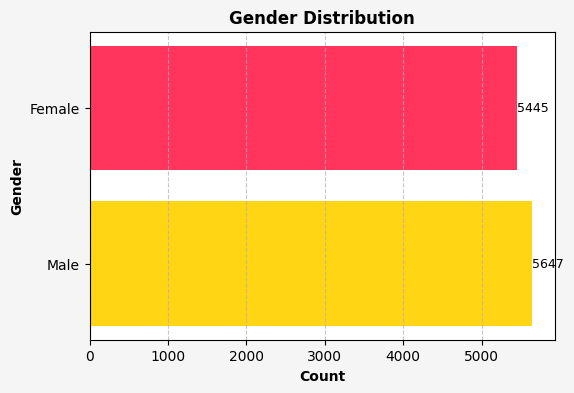

In [13]:
# Count the number of occurrences of each gender
gender_counts = gender.value_counts()

# Plot the horizontal bar chart
plt.figure(figsize=(6, 4), facecolor='#f6f5f5')

# Plot horizontal bar chart
plt.barh(gender_counts.index, gender_counts.values, color=['#ffd514', '#ff355d'])

# Add labels and title
plt.xlabel('Count', fontsize=10, weight='bold')
plt.ylabel('Gender', fontsize=10, weight='bold')
plt.title('Gender Distribution', fontsize=12, weight='bold')

# Add value labels to bars
for index, value in enumerate(gender_counts.values):
    plt.text(value, index, f'{value}', va='center', fontsize=9, color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## 5.4 Participation per Discipline

In [14]:
teams = pd.read_csv("teams.csv")
discipline_counts = teams['discipline']

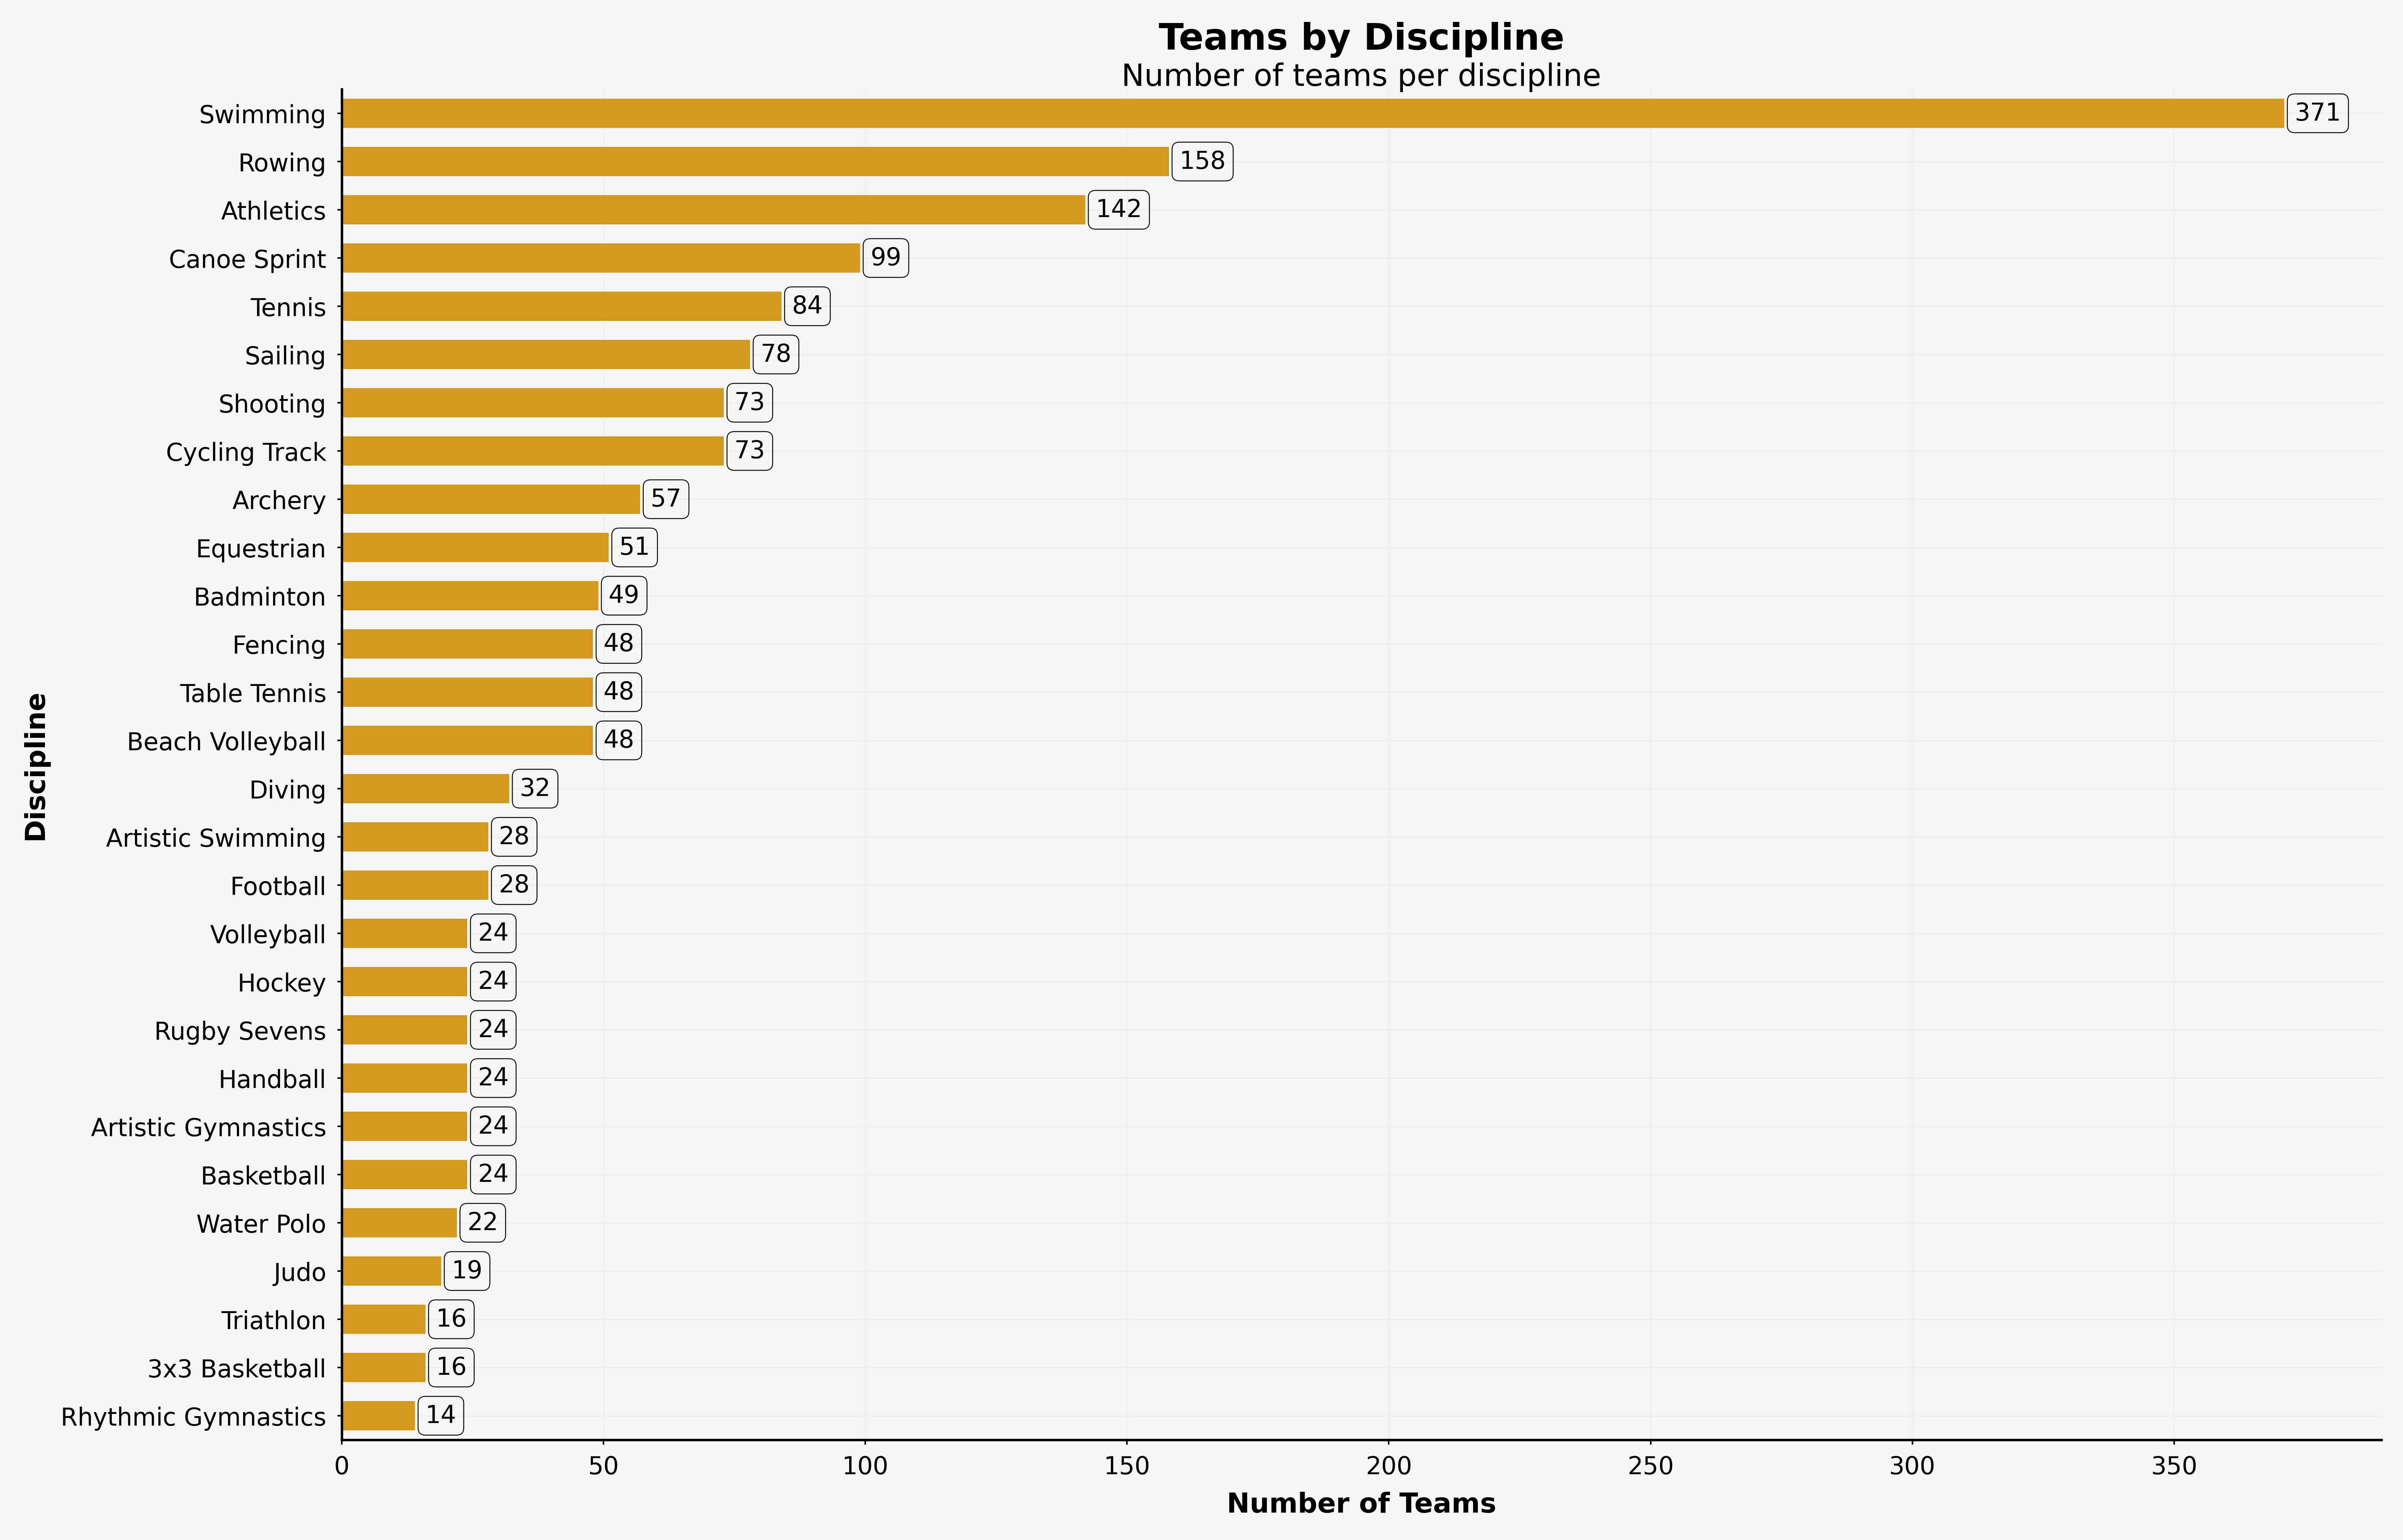

In [15]:
# Count the number of teams by discipline
discipline_counts = teams['discipline'].value_counts()

# Plot horizontal bar chart
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(12, 8), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(sns.color_palette([
    '#f5a300', '#d73c45', '#5c5b5b', '#009B77', '#F4A300',
    '#00A3E0', '#C8102E', '#E5E5E5', '#007A33', '#F9A11B'
]))
ax0 = fig.add_subplot(gs[0, 0])

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.set_facecolor(background_color)

# Bar plot for number of teams by discipline
ax0_sns = sns.barplot(y=discipline_counts.index, x=discipline_counts.values, ax=ax0, zorder=2, width=0.6)
ax0_sns.set_xlabel('Number of Teams', fontsize=9, weight='bold')
ax0_sns.set_ylabel('Discipline', fontsize=9, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

ax0_sns.tick_params(labelsize=8, width=0.5, length=1.5)

# Annotate bars with counts
for p in ax0_sns.patches:
    value = f'{p.get_width():.0f}'
    x = p.get_x() + p.get_width() + 2
    y = p.get_y() + p.get_height() / 2
    ax0.text(x, y, value, ha='left', va='center', fontsize=8,
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

# Title and annotations
ax0_sns.text(0.5, 1.05, 'Teams by Discipline', fontsize=12, weight='bold', ha='center', va='top', transform=ax0.transAxes)
ax0_sns.text(0.5, 1.02, 'Number of teams per discipline', fontsize=10, ha='center', va='top', transform=ax0.transAxes)

plt.show()

## 5.5 Events Timeline
* Timeline of the Events

In [16]:
schedule = pd.read_csv("schedules.csv")
schedule.head()

,start_date,end_date,day,status,discipline,discipline_code,event,event_medal,phase,gender,event_type,venue,venue_code,location_description,location_code,url
0,2024-07-24T15:00:00+02:00,2024-07-24T16:45:00+02:00,2024-07-24,FINISHED,Football,FBL,Men,0,Men's Group B,M,HTEAM,Geoffroy-Guichard Stadium,STE,"Geoffroy-Guichard Stadium, Saint-Etienne",STE,/en/paris-2024/results/football/men/gpb-000100--
1,2024-07-24T15:00:00+02:00,2024-07-24T16:45:00+02:00,2024-07-24,FINISHED,Football,FBL,Men,0,Men's Group C,M,HTEAM,Parc des Princes,PDP,"Parc des Princes, Paris",PDP,/en/paris-2024/results/football/men/gpc-000100--
2,2024-07-24T15:30:00+02:00,2024-07-24T15:46:00+02:00,2024-07-24,FINISHED,Rugby Sevens,RU7,Men,0,Men's Pool B,M,HTEAM,Stade de France,STA,Stade de France,STA,/en/paris-2024/results/rugby-sevens/men/gpb-00...
3,2024-07-24T16:00:00+02:00,2024-07-24T16:16:00+02:00,2024-07-24,FINISHED,Rugby Sevens,RU7,Men,0,Men's Pool B,M,HTEAM,Stade de France,STA,Stade de France,STA,/en/paris-2024/results/rugby-sevens/men/gpb-00...
4,2024-07-24T16:30:00+02:00,2024-07-24T16:46:00+02:00,2024-07-24,FINISHED,Rugby Sevens,RU7,Men,0,Men's Pool C,M,HTEAM,Stade de France,STA,Stade de France,STA,/en/paris-2024/results/rugby-sevens/men/gpc-00...


In [17]:
schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3895 entries, 0 to 3894
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   start_date            3895 non-null   object
 1   end_date              3893 non-null   object
 2   day                   3895 non-null   object
 3   status                3894 non-null   object
 4   discipline            3895 non-null   object
 5   discipline_code       3895 non-null   object
 6   event                 3893 non-null   object
 7   event_medal           3895 non-null   int64 
 8   phase                 3893 non-null   object
 9   gender                3893 non-null   object
 10  event_type            3893 non-null   object
 11  venue                 3893 non-null   object
 12  venue_code            3893 non-null   object
 13  location_description  3893 non-null   object
 14  location_code         3893 non-null   object
 15  url                   3810 non-null   

In [18]:
schedule['start_date'] = pd.to_datetime(schedule['start_date'])
schedule['end_date'] = pd.to_datetime(schedule['end_date'])

# Extract date part for aggregation
schedule['date'] = schedule['start_date'].dt.date

event_counts = schedule.groupby('date').size().reset_index(name='event_count')

# Plotting the timeline of events
fig = px.line(event_counts, x='date', y='event_count',
              title='Olympics Event Timeline',
              labels={'date': 'Date', 'event_count': 'Number of Events'},
              markers=True)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Number of Events",
    title_x=0.5,
    template='plotly_white'
)

fig.show()

* Prime Time Analysis

In [19]:
prime_time_start = pd.to_datetime('19:00:00').time()
prime_time_end = pd.to_datetime('23:00:00').time()
schedule['start_time'] = pd.to_datetime(schedule['start_date']).dt.time

prime_time_events = schedule[(schedule['start_time'] >= prime_time_start) &
                             (schedule['start_time'] <= prime_time_end)]

prime_time_by_discipline = prime_time_events['discipline'].value_counts()
prime_time_by_day = prime_time_events['day'].value_counts()

print("Prime Time Events by Discipline:")
print(prime_time_by_discipline)

print("\nPrime Time Events by Day:")
print(prime_time_by_day)

fig1 = px.bar(prime_time_by_discipline, x=prime_time_by_discipline.index, y=prime_time_by_discipline.values,
              title="Prime Time Events by Discipline",
              labels={'x': 'Discipline', 'y': 'Number of Events'},
              color_discrete_sequence=['#FFD700', '#C0C0C0', '#CD7F32'])

fig1.update_layout(
    xaxis_title="Discipline",
    yaxis_title="Number of Events",
    template="plotly_white"
)

# Bar plot for Prime Time Events by Day
fig2 = px.bar(prime_time_by_day, x=prime_time_by_day.index, y=prime_time_by_day.values,
              title="Prime Time Events by Day",
              labels={'x': 'Day', 'y': 'Number of Events'},
              color_discrete_sequence=['#FFD700', '#C0C0C0', '#CD7F32'])

fig2.update_layout(
    xaxis_title="Day",
    yaxis_title="Number of Events",
    template="plotly_white"
)

# Show plots
fig1.show()
fig2.show()

Prime Time Events by Discipline:
discipline
Boxing                   98
Athletics                68
Table Tennis             56
Badminton                55
Swimming                 54
Wrestling                50
Taekwondo                40
Beach Volleyball         38
Fencing                  36
3x3 Basketball           31
Football                 30
Surfing                  29
Rugby Sevens             28
Cycling Track            28
Handball                 24
Water Polo               22
Hockey                   20
Cycling BMX Racing       16
Breaking                 16
Basketball               14
Tennis                   14
Archery                  13
Volleyball               13
Artistic Swimming         5
Weightlifting             4
Sailing                   2
Artistic Gymnastics       2
Trampoline Gymnastics     1
Opening Ceremony          1
Modern Pentathlon         1
Closing Ceremony          1
Name: count, dtype: int64

Prime Time Events by Day:
day
2024-07-27    78
2024-07-28    

## 5.6 Results/Medals Tally

In [20]:
medals = pd.read_csv("medals_total.csv")
medals.head()

,country_code,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,38,42,42,122
1,CHN,38,27,24,89
2,AUS,18,18,14,50
3,JPN,18,12,13,43
4,FRA,16,24,22,62


In [21]:
medals.columns

Index(['country_code', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total'], dtype='object')

In [22]:
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(30, 12), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#FFD700', '#C0C0C0', '#CD7F32'])
ax0 = fig.add_subplot(gs[0, 0])

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.set_facecolor(background_color)

# Convert to vertical bar plot
ax0_sns = medals.plot(x='country_code', y=['Gold Medal', 'Silver Medal', 'Bronze Medal'], kind='bar', ax=ax0, zorder=2, width=0.8)

ax0_sns.set_xlabel('Team Name', fontsize=10, weight='bold')
ax0_sns.set_ylabel('Medals Count', fontsize=10, weight='bold')

ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)

ax0_sns.tick_params(labelsize=8, width=0.5, length=1.5)

ax0_sns.legend(['Gold', 'Silver', 'Bronze'], ncol=3, facecolor='#D8D8D8', edgecolor=background_color, fontsize=8, bbox_to_anchor=(1.005, 1), loc='upper right')

for p in ax0_sns.patches:
    value = f'{p.get_height():.0f}'
    if value == '0':
        pass
    else:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 1
        ax0.text(x, y, value, ha='center', va='bottom', fontsize=8)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(Xend, Yend + 0.05*Yend, 'Medals Plot', fontsize=12, weight='bold', ha='right')
ax0.text(Xend, Yend, 'Medals as on 10th August 2024', fontsize=10, ha='right')

plt.show()

In [23]:
medals_data = medals[['country_code', 'Gold Medal', 'Silver Medal', 'Bronze Medal']]
medals_data = medals_data.set_index('country_code').sort_values(by=['Gold Medal', 'Silver Medal', 'Bronze Medal'], ascending=False)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=medals_data.index,
    y=medals_data['Gold Medal'],
    name='Gold',
    marker_color='#FFD700'
))

fig.add_trace(go.Bar(
    x=medals_data.index,
    y=medals_data['Silver Medal'],
    name='Silver',
    marker_color='#C0C0C0'
))

fig.add_trace(go.Bar(
    x=medals_data.index,
    y=medals_data['Bronze Medal'],
    name='Bronze',
    marker_color='#CD7F32'
))

# Customize layout
fig.update_layout(
    barmode='stack',
    xaxis_title='Team Name',
    yaxis_title='Medals Count',
    title='Medals Plot',
    plot_bgcolor='#f6f5f5',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    font=dict(size=14),
)

for idx, country in enumerate(medals_data.index):
    for medal, color in zip(['Gold Medal', 'Silver Medal', 'Bronze Medal'], ['#FFD700', '#C0C0C0', '#CD7F32']):
        count = medals_data.at[country, medal]
        if count > 0:
            fig.add_annotation(
                x=country,
                y=sum(medals_data.loc[country, ['Gold Medal', 'Silver Medal', 'Bronze Medal']][medals_data.columns.get_loc(medal):]),
                text=str(count),
                showarrow=False,
                font=dict(color='black', size=12),
                xanchor='center'
            )

fig.show()

# 6. Conclusion

In this analysis, we have explored various aspects of the Paris 2024 Summer Olympics, including athlete demographics, country participation, events timeline, prime time analysis, and medal distribution. Through visualizations and detailed examination, we've gained insights into the participation patterns and performance trends of this grand event.

We extend our gratitude to the person who provided this dataset. Your contribution has been invaluable in making this analysis possible.



Thank you!
